In [1]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50


In [2]:
# Pfad zur ZIP-Datei mit dem Datensatz
dataset_zip = 'data/dataset.zip'
# Pfad zum extrahierten Datensatz
dataset_dir = 'dataset'

# ZIP-Datei extrahieren
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall(dataset_dir)

# Pfade zu den Trainings- und Validierungsverzeichnissen
train_dir = os.path.join(dataset_dir, 'dataset/train')
validation_dir = os.path.join(dataset_dir, 'dataset/validation')

# Anzahl der Bilder im Datensatz
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])


In [3]:
# Bild-Daten-Generator für Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator()

In [4]:
# Daten-Generatoren für Trainings- und Validierungsdaten erstellen
batch_size = 16
train_dir = "data/train/"
val_dir = "data/validation/"
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 280 images belonging to 2 classes.
Found 112 images belonging to 2 classes.


In [5]:
# ResNet50-Modell erstellen
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Neuen Klassifikations-Layer zum Modell hinzufügen
num_classes = len(train_generator.class_indices)


In [6]:
model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# Modell kompilieren
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
# Modell trainieren
epochs = 10

history = model.fit(
    train_generator,
    epochs=epochs,
    steps_per_epoch= 10,
    validation_data=validation_generator,
    validation_steps=total_val // batch_size
)

Epoch 1/10
10/10 [==============================] - 15s 2s/step - loss: 0.4344 - accuracy: 0.8092
Epoch 2/10
10/10 [==============================] - 16s 2s/step - loss: 1.4648 - accuracy: 0.8687
Epoch 3/10
10/10 [==============================] - 15s 2s/step - loss: 0.6806 - accuracy: 0.9408
Epoch 4/10
10/10 [==============================] - 16s 2s/step - loss: 0.4286 - accuracy: 0.9079
Epoch 5/10
10/10 [==============================] - 16s 2s/step - loss: 0.4385 - accuracy: 0.9250
Epoch 6/10
10/10 [==============================] - 15s 2s/step - loss: 0.3379 - accuracy: 0.8882
Epoch 7/10
10/10 [==============================] - 16s 2s/step - loss: 0.1425 - accuracy: 0.9375
Epoch 8/10
10/10 [==============================] - 16s 2s/step - loss: 0.1106 - accuracy: 0.9563
Epoch 9/10
10/10 [==============================] - 16s 2s/step - loss: 0.2928 - accuracy: 0.9474
Epoch 10/10
10/10 [==============================] - 16s 2s/step - loss: 0.1099 - accuracy: 0.9750


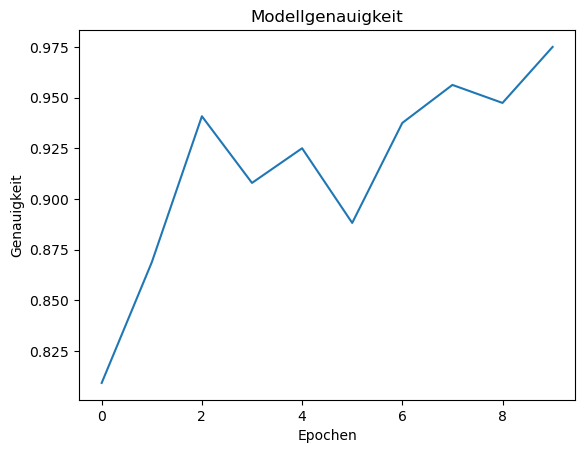

In [8]:
# Genauigkeit und Verlust im Verlauf plotten
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Modellgenauigkeit')
plt.xlabel('Epochen')
plt.ylabel('Genauigkeit')
plt.show()
